Scaling and Clustering of the spotify library:

In [40]:
import scalingclustering
from scalingclustering import load_playlist_pkl, yellowbricking, apply_scaler, apply_kmeans, predict_kmeans, elbowing, silhouetting, save_pkl, load_pkl
import pandas as pd
import datetime
import seaborn as sns


In [2]:
sp_library = load_playlist_pkl()

In [3]:
sp_library.head()

playlistID                                          TrackName  \
0  37i9dQZEVXbNG2KDcFcKOF                                          As It Was   
1  37i9dQZEVXbNG2KDcFcKOF                                        First Class   
2  37i9dQZEVXbNG2KDcFcKOF                                         Heat Waves   
3  37i9dQZEVXbNG2KDcFcKOF                          STAY (with Justin Bieber)   
4  37i9dQZEVXbNG2KDcFcKOF  Enemy (with JID) - from the series Arcane Leag...   

                  TrackID                                          SampleURL  \
0  4LRPiXqCikLlN15c3yImP7  https://p.scdn.co/mp3-preview/e9216304e6456a90...   
1  1rDQ4oMwGJI7B4tovsBOxc  https://p.scdn.co/mp3-preview/27913e771fb16c54...   
2  02MWAaffLxlfxAUY7c5dvx  https://p.scdn.co/mp3-preview/1ac449e52145d1c4...   
3  5PjdY0CKGZdEuoNab3yDmX  https://p.scdn.co/mp3-preview/40a8daf1f3cbb5c6...   
4  1HhNoOuqm1a5MXYEgAFl8o  https://p.scdn.co/mp3-preview/8fac3ac79cc1f0c1...   

  ReleaseYear                                             Genres danceability  \
0  2022-03-31                                              [pop]         0.52   
1  2022-04-08  [deep underground hip hop, kentucky hip hop, rap]        0.905   
2  2020-08-06              [gauze pop, indietronica, shiver pop]        0.761   
3  2021-07-23                               [australian hip hop]        0.591   
4  2021-09-03                                [modern rock, rock]        0.728   

  energy loudness speechiness acousticness instrumentalness liveness valence  \
0  0.731   -5.338      0.0557        0.342          0.00101    0.311   0.662   
1  0.563   -6.135       0.102       0.0254          0.00001    0.113   0.324   
2  0.525     -6.9      0.0944         0.44         0.000007   0.0921   0.531   
3  0.764   -5.484      0.0483       0.0383                0    0.103   0.478   
4  0.783   -4.424       0.266        0.237                0    0.434   0.555   

     tempo key mode duration_ms  Popularity  
0   173.93   6    0      167303       100.0  
1  106.998   8    1      173948        95.0  
2    80.87  11    1      238805        90.0  
3  169.928   1    1      141806        88.0  
4   77.011  11    0      173381        85.0

In [4]:
pl_dict = {}
i = 0
for index in sp_library['playlistID'].value_counts().index:
    pl_dict[index] = i
    i += 1

In [5]:
pl_dict

{'37i9dQZF1DX0pH2SQMRXnC': 0,
 '37i9dQZF1DX6VdMW310YC7': 1,
 '37i9dQZF1DX0hvSv9Rf41p': 2,
 '37i9dQZF1DX1OIMC8iDi74': 3,
 '37i9dQZF1DWTvNyxOwkztu': 4,
 '37i9dQZF1DX6GJXiuZRisr': 5,
 '37i9dQZF1DX3d2wagqzwmM': 6,
 '37i9dQZF1DX5xiztvBdlUf': 7,
 '37i9dQZF1DX5wDmLW735Yd': 8,
 '37i9dQZF1DWTiVLKoHQ1yC': 9,
 '37i9dQZF1DX8ZMwsPgxIOs': 10,
 '37i9dQZF1DX0BcQWzuB7ZO': 11,
 '37i9dQZF1DX8AliSIsGeKd': 12,
 '37i9dQZF1DX3jWba5xiDhV': 13,
 '37i9dQZF1DX0AZ24QB6TCx': 14,
 '37i9dQZF1DX37cXruBmbRS': 15,
 '37i9dQZF1DX2pprEpa9URZ': 16,
 '37i9dQZF1DX1tW4VlEfDSS': 17,
 '37i9dQZF1DWVdgXTbYm2r0': 18,
 '37i9dQZF1DX6J5NfMJS675': 19,
 '37i9dQZF1DX7Mq3mO5SSDc': 20,
 '37i9dQZEVXbNG2KDcFcKOF': 21,
 '37i9dQZF1DX6ApTpuYN5Gl': 22,
 '37i9dQZF1DX2lUf1uE6Mre': 23,
 '37i9dQZF1DX2GKumqRIZ7g': 24,
 '37i9dQZF1DX1GT5IIzDqMe': 25,
 '37i9dQZF1DX11pUHJdXMnN': 26,
 '6bNfe6grcjKmeNEsctWAXm': 27}

In [6]:
for pl_id in sp_library['playlistID']:
    sp_library['playlistnr'] = pl_dict[pl_id]
   

In [7]:
sp_library['Year'] = pd.to_datetime(sp_library['ReleaseYear'], format='%Y-%m-%d')
sp_library['Year'] = pd.DatetimeIndex(sp_library['Year']).year

In [8]:
sp_library.columns

Index(['playlistID', 'TrackName', 'TrackID', 'SampleURL', 'ReleaseYear',
       'Genres', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key', 'mode', 'duration_ms', 'Popularity', 'playlistnr', 'Year'],
      dtype='object')

Columns for clustering:
'danceability'
'energy'
'loudness'
'speechiness'  # detects the presence of spoken words in a track
'acousticness'
'instrumentalness'
'liveness'  # Detects the presence of an audience in the recording
'valence'  # A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
'tempo'


Add later when data exists:
'time_signature'
'popularity'

In [9]:
X = sp_library[['danceability',
                'energy',
                'loudness',
                'speechiness',
                'acousticness',
               'instrumentalness',
               'liveness', 
                'valence',  
                'tempo',
                'playlistnr',
                'Year',
                'Popularity']]

In [10]:
X_scaled_df, scaler = apply_scaler(X)

danceability energy loudness speechiness acousticness instrumentalness  \
0         0.52  0.731   -5.338      0.0557        0.342          0.00101   
1        0.905  0.563   -6.135       0.102       0.0254          0.00001   
2        0.761  0.525     -6.9      0.0944         0.44         0.000007   
3        0.591  0.764   -5.484      0.0483       0.0383                0   
4        0.728  0.783   -4.424       0.266        0.237                0   

  liveness valence    tempo  playlistnr  Year  Popularity  
0    0.311   0.662   173.93          27  2022       100.0  
1    0.113   0.324  106.998          27  2022        95.0  
2   0.0921   0.531    80.87          27  2020        90.0  
3    0.103   0.478  169.928          27  2021        88.0  
4    0.434   0.555   77.011          27  2021        85.0

danceability    energy  loudness  speechiness  acousticness  \
0     -0.968194 -0.077285  0.689614    -0.328527      1.131932   
1      1.829698 -1.076318  0.453926     0.230945     -0.523491   
2      0.783214 -1.302290  0.227701     0.139110      1.644350   
3     -0.452219  0.118954  0.646439    -0.417946     -0.456040   
4      0.543394  0.231940  0.959901     2.212663      0.582913   

   instrumentalness  liveness   valence     tempo  playlistnr      Year  \
0         -1.145818  0.868120  1.217278  2.311518         0.0  0.440308   
1         -1.148369 -0.425615 -0.097253 -0.941231         0.0  0.440308   
2         -1.148376 -0.562176  0.707800 -2.210994         0.0  0.182009   
3         -1.148393 -0.490955  0.501676  2.117030         0.0  0.311158   
4         -1.148393  1.671804  0.801140 -2.398533         0.0  0.311158   

   Popularity  
0    3.153928  
1    2.877068  
2    2.600208  
3    2.489464  
4    2.323348

In [11]:
n=5
kmeans = apply_kmeans(X_scaled_df, n)
kmeans.labels_

array([2, 2, 2, ..., 0, 1, 1])

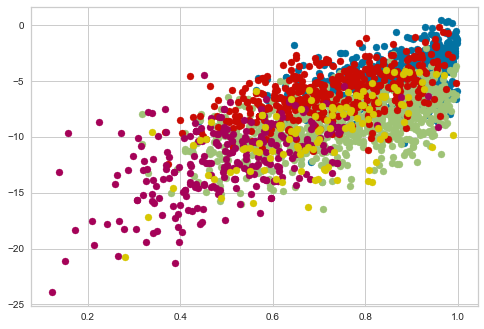

In [12]:
labels, clusters = predict_kmeans(X_scaled_df, X, kmeans)

In [13]:
clusters

array([0, 1, 2, 3, 4])

In [14]:
labels

array([2, 2, 2, ..., 0, 1, 1])

In [15]:
#clusters
pd.Series(labels).value_counts().sort_index()

0    538
1    866
2    426
3    264
4    122
dtype: int64

In [16]:
#X_df = pd.DataFrame(X)
X["label"] = labels
X

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19824\2804256885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = labels


danceability energy loudness speechiness acousticness instrumentalness  \
0          0.52  0.731   -5.338      0.0557        0.342          0.00101   
1         0.905  0.563   -6.135       0.102       0.0254          0.00001   
2         0.761  0.525     -6.9      0.0944         0.44         0.000007   
3         0.591  0.764   -5.484      0.0483       0.0383                0   
4         0.728  0.783   -4.424       0.266        0.237                0   
..          ...    ...      ...         ...          ...              ...   
40        0.561  0.957   -5.926      0.0362     0.000589            0.322   
41        0.676  0.956   -9.102      0.0342        0.563            0.911   
42         0.66  0.799   -6.934      0.0719        0.179         0.000364   
43        0.548  0.649  -10.285      0.0336       0.0196            0.902   
44        0.592  0.821  -10.016      0.0324       0.0169            0.919   

   liveness valence    tempo  playlistnr  Year  Popularity  label  
0     0.311   0.662   173.93          27  2022       100.0      2  
1     0.113   0.324  106.998          27  2022        95.0      2  
2    0.0921   0.531    80.87          27  2020        90.0      2  
3     0.103   0.478  169.928          27  2021        88.0      0  
4     0.434   0.555   77.011          27  2021        85.0      2  
..      ...     ...      ...         ...   ...         ...    ...  
40    0.417    0.13  123.976          27  2022        53.0      0  
41    0.107   0.204  123.992          27  2022        50.0      3  
42    0.701   0.148   126.08          27  2022        74.0      0  
43    0.225  0.0545  120.015          27  2022        25.0      1  
44    0.119  0.0547  121.998          27  2022        15.0      1  

[2216 rows x 13 columns]

In [17]:
X[X['label'] == 1].sample()

danceability energy loudness speechiness acousticness instrumentalness  \
45        0.663  0.869  -10.235      0.0404      0.00359            0.734   

   liveness valence   tempo  playlistnr  Year  Popularity  label  
45    0.127  0.0266  123.01          27  2022        38.0      1

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



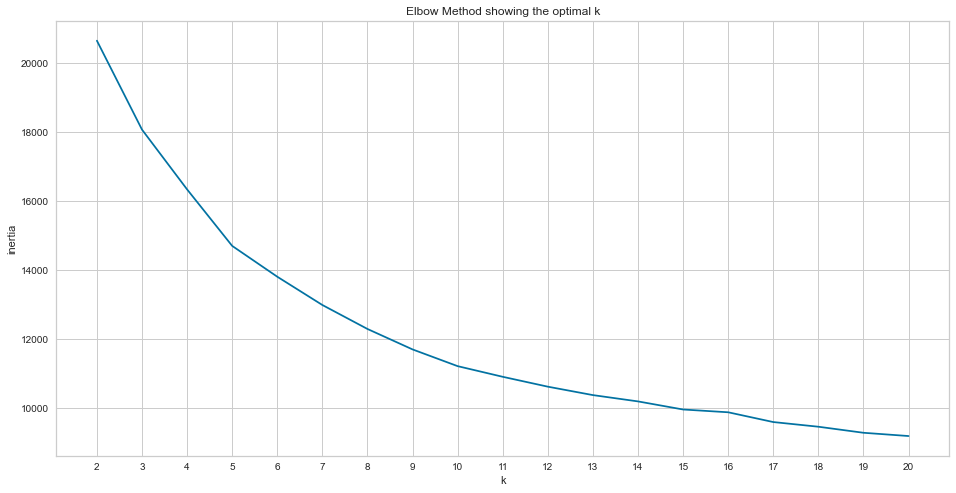

In [18]:
elbowing(X_scaled_df)

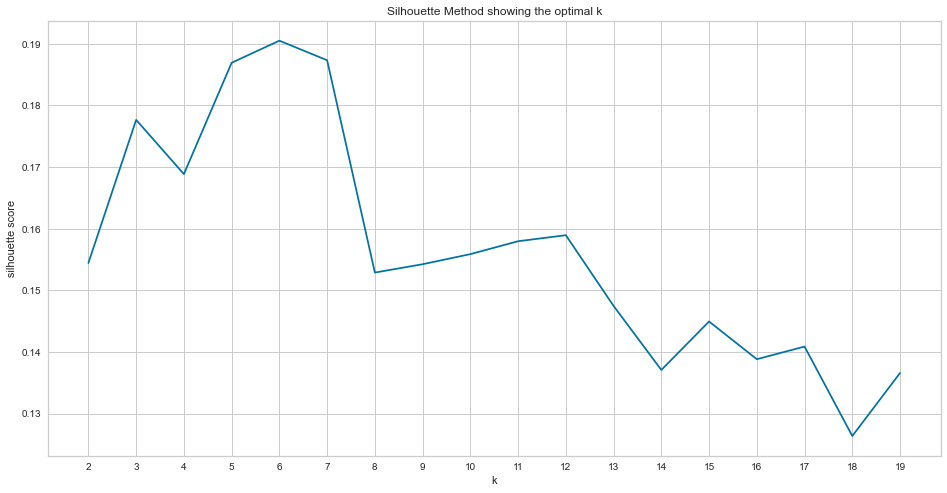

In [19]:
silhouetting(X_scaled_df)

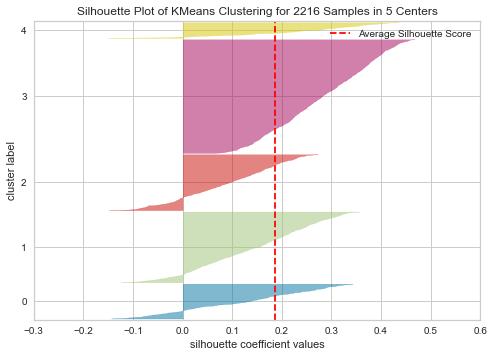

In [20]:
yellowbricking(X_scaled_df, n)

danceability    energy  loudness  speechiness  acousticness  \
0        -0.968194 -0.077285  0.689614    -0.328527      1.131932   
1         1.829698 -1.076318  0.453926     0.230945     -0.523491   
2         0.783214 -1.302290  0.227701     0.139110      1.644350   
3        -0.452219  0.118954  0.646439    -0.417946     -0.456040   
4         0.543394  0.231940  0.959901     2.212663      0.582913   
...            ...       ...       ...          ...           ...   
2211     -0.670237  1.266653  0.515731    -0.564158     -0.653221   
2212      0.165497  1.260707 -0.423471    -0.588326      2.287486   
2213      0.049221  0.327086  0.217647    -0.132772      0.279646   
2214     -0.764711 -0.564908 -0.773306    -0.595576     -0.553818   
2215     -0.444952  0.457912 -0.693758    -0.610076     -0.567935   

      instrumentalness  liveness   valence     tempo  playlistnr      Year  \
0            -1.145818  0.868120  1.217278  2.311518         0.0  0.440308   
1            -1.148369 -0.425615 -0.097253 -0.941231         0.0  0.440308   
2            -1.148376 -0.562176  0.707800 -2.210994         0.0  0.182009   
3            -1.148393 -0.490955  0.501676  2.117030         0.0  0.311158   
4            -1.148393  1.671804  0.801140 -2.398533         0.0  0.311158   
...                ...       ...       ...       ...         ...       ...   
2211         -0.327406  1.560726 -0.851747 -0.116137         0.0  0.440308   
2212          1.174338 -0.464819 -0.563950 -0.115359         0.0  0.440308   
2213         -1.147465  3.416386 -0.781742 -0.013887         0.0  0.440308   
2214          1.151391  0.306195 -1.145378 -0.308633         0.0  0.440308   
2215          1.194735 -0.386411 -1.144600 -0.212263         0.0  0.440308   

      Popularity  
0       3.153928  
1       2.877068  
2       2.600208  
3       2.489464  
4       2.323348  
...          ...  
2211    0.551446  
2212    0.385330  
2213    1.714257  
2214   -0.998969  
2215   -1.552689  

[2216 rows x 12 columns]

In [57]:
X['label'].value_counts()

1    866
0    538
2    426
3    264
4    122
Name: label, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


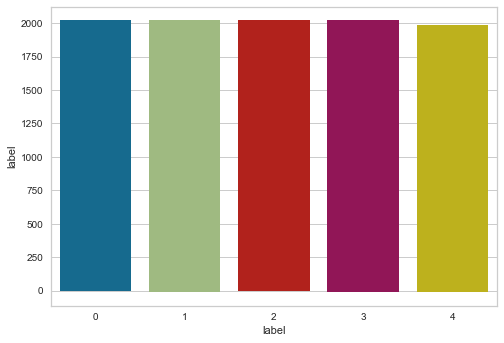

In [52]:
for label in X['label'].values:
    print(sns.barplot(data= pd.DataFrame(X.groupby('label')[col].mean()), x= pd.DataFrame(X.groupby('label')[col].mean()).index, y=col ))

In [27]:
X.groupby('label').describe()['Popularity']

count       mean        std  min    25%   50%    75%    max
label                                                             
0      538.0  42.873606  16.036353  0.0  37.00  45.0  52.00   92.0
1      866.0  36.662818  14.362344  0.0  30.00  39.0  46.00   69.0
2      426.0  58.230047  18.128785  0.0  45.00  57.0  73.00  100.0
3      264.0  40.803030  17.744250  0.0  34.00  44.5  51.25   89.0
4      122.0  40.860656  19.981940  0.0  32.25  42.5  55.00   74.0